## Team:
######Mona ElSayed       19105733
######Reem Abdelazim     19100671
######Sohaila Hussein    19104679
######Israa Salah        19105880
######Alaa Nasser        19105715

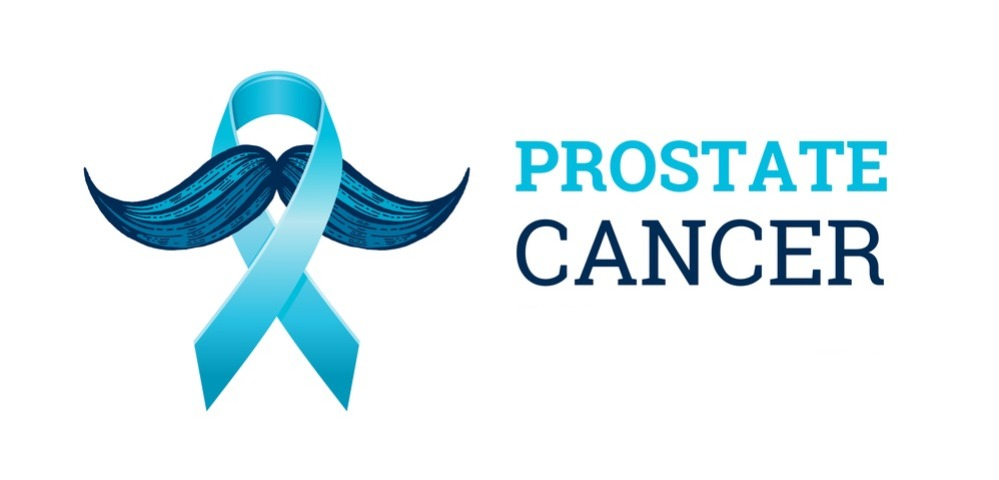

In [3]:
import os
import numpy as np 
import pandas as pd
import tensorflow as tf
import seaborn as sns
from sklearn.svm import SVC
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn import preprocessing
from keras.models import Sequential
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix 
from keras.metrics import mean_squared_error
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from keras.layers import Dense, SimpleRNN, Dropout
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import average_precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier


In [4]:
#PCD = Prostate Cancer Data
PCD = pd.read_csv("Prostate_Cancer.csv")

In [5]:
print('Dataset :',PCD.shape)
x = PCD.iloc[:, [0, 1, 2, 3]].values
PCD.info()
PCD[0:5]

Dataset : (100, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [6]:
PCD.columns

Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

In [7]:
#Beningn Tumour  : Noncancerous
#Malignant Tumour: Cancerous
PCD['diagnosis_result'] = PCD['diagnosis_result'].replace(['B'],'0')
PCD['diagnosis_result'] = PCD['diagnosis_result'].replace(['M'],'1')

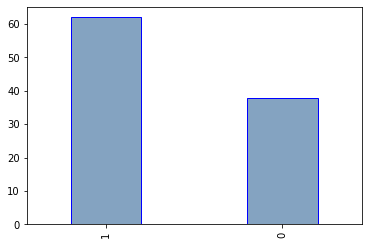

In [8]:
PCD.diagnosis_result.value_counts().plot(kind='bar', color=(0.2, 0.4, 0.6, 0.6),edgecolor='blue', width = 0.4)
plt.show()

In [9]:
PCD.drop(['id'],axis=1,inplace=True)

In [10]:
PCD.head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,23,12,151,954,0.143,0.278,0.242,0.079
1,0,9,13,133,1326,0.143,0.079,0.181,0.057
2,1,21,27,130,1203,0.125,0.160,0.207,0.060
3,1,14,16,78,386,0.070,0.284,0.260,0.097
4,1,9,19,135,1297,0.141,0.133,0.181,0.059


<AxesSubplot:>

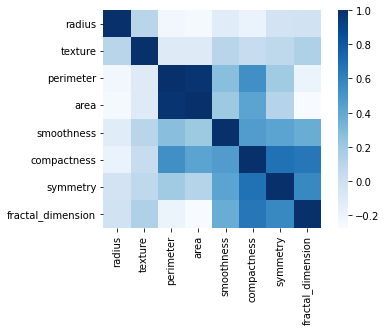

In [11]:
Cancer = PCD[['diagnosis_result', 'radius','texture','perimeter','area', 'smoothness', 'compactness', 'symmetry', 'fractal_dimension']] 
cor = Cancer.corr() 
sns.heatmap(cor, square = True,cmap="Blues")

In [12]:
y = PCD.diagnosis_result.values
PCD_without_D = PCD.drop(['diagnosis_result'],axis=1)

In [13]:
y

array(['1', '0', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0',
       '1', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1',
       '1', '1', '1', '1', '1', '1', '1', '0', '1', '0', '0', '0', '0',
       '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1',
       '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '1',
       '1', '0', '0', '0', '1', '1', '0', '1', '1', '1', '0', '0', '0',
       '1', '0', '0', '1', '1', '0', '0', '0', '1'], dtype=object)

In [14]:
# Normalization: Normalization means all of the values of data, scale between 0 and 1.
S_caler = MinMaxScaler(feature_range=(0,1))
x = S_caler.fit_transform(PCD_without_D)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
#To compare between models accuracy
ModelName=[]
ModelAccuracy=[]

#Artificial·Neural·Network


In [17]:
def buildclass():
    classifier = Sequential()
    classifier.add(Dense(units = 50, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [18]:
classifier = KerasClassifier(build_fn = buildclass, epochs = 300)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()

print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

/var/folders/m5/2ls_xkhd5pqdvzj3fx7w8pf00000gn/T/ipykernel_20725/3573363665.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn = buildclass, epochs = 300)
2023-01-08 14:22:36.462273: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/300
2/2 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.5094
Epoch 2/300
2/2 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.6604
Epoch 3/300
2/2 [==============================] - 0s 5ms/step - loss: 0.6928 - accuracy: 0.5472
Epoch 4/300
2/2 [==============================] - 0s 6ms/step - loss: 0.6926 - accuracy: 0.5472
Epoch 5/300
2/2 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5472
Epoch 6/300
2/2 [==============================] - 0s 4ms/step - loss: 0.6922 - accuracy: 0.5472
Epoch 7/300
2/2 [==============================] - 0s 5ms/step - loss: 0.6920 - accuracy: 0.5472
Epoch 8/300
2/2 [==============================] - 0s 6ms/step - loss: 0.6919 - accuracy: 0.5472
Epoch 9/300
2/2 [==============================] - 0s 6ms/step - loss: 0.6915 - accuracy: 0.5472
Epoch 10/300
2/2 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5472
Epoch 11/300
2/2 [===========

2/2 [==============================] - 0s 3ms/step - loss: 0.3669 - accuracy: 0.9057
Epoch 85/300
2/2 [==============================] - 0s 2ms/step - loss: 0.3632 - accuracy: 0.9057
Epoch 86/300
2/2 [==============================] - 0s 2ms/step - loss: 0.3599 - accuracy: 0.9057
Epoch 87/300
2/2 [==============================] - 0s 2ms/step - loss: 0.3561 - accuracy: 0.9057
Epoch 88/300
2/2 [==============================] - 0s 2ms/step - loss: 0.3543 - accuracy: 0.9057
Epoch 89/300
2/2 [==============================] - 0s 2ms/step - loss: 0.3511 - accuracy: 0.9245
Epoch 90/300
2/2 [==============================] - 0s 3ms/step - loss: 0.3473 - accuracy: 0.9245
Epoch 91/300
2/2 [==============================] - 0s 2ms/step - loss: 0.3448 - accuracy: 0.9245
Epoch 92/300
2/2 [==============================] - 0s 2ms/step - loss: 0.3419 - accuracy: 0.9245
Epoch 93/300
2/2 [==============================] - 0s 2ms/step - loss: 0.3394 - accuracy: 0.9245
Epoch 94/300
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.2306 - accuracy: 0.9245
Epoch 168/300
2/2 [==============================] - 0s 3ms/step - loss: 0.2303 - accuracy: 0.9245
Epoch 169/300
2/2 [==============================] - 0s 2ms/step - loss: 0.2294 - accuracy: 0.9245
Epoch 170/300
2/2 [==============================] - 0s 2ms/step - loss: 0.2284 - accuracy: 0.9245
Epoch 171/300
2/2 [==============================] - 0s 2ms/step - loss: 0.2274 - accuracy: 0.9245
Epoch 172/300
2/2 [==============================] - 0s 3ms/step - loss: 0.2266 - accuracy: 0.9245
Epoch 173/300
2/2 [==============================] - 0s 2ms/step - loss: 0.2264 - accuracy: 0.9245
Epoch 174/300
2/2 [==============================] - 0s 2ms/step - loss: 0.2260 - accuracy: 0.9245
Epoch 175/300
2/2 [==============================] - 0s 2ms/step - loss: 0.2253 - accuracy: 0.9245
Epoch 176/300
2/2 [==============================] - 0s 2ms/step - loss: 0.2244 - accuracy: 0.9245
Epoch 177/300
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 0.1907 - accuracy: 0.9434
Epoch 250/300
2/2 [==============================] - 0s 3ms/step - loss: 0.1905 - accuracy: 0.9434
Epoch 251/300
2/2 [==============================] - 0s 2ms/step - loss: 0.1901 - accuracy: 0.9434
Epoch 252/300
2/2 [==============================] - 0s 3ms/step - loss: 0.1896 - accuracy: 0.9434
Epoch 253/300
2/2 [==============================] - 0s 2ms/step - loss: 0.1895 - accuracy: 0.9434
Epoch 254/300
2/2 [==============================] - 0s 2ms/step - loss: 0.1888 - accuracy: 0.9434
Epoch 255/300
2/2 [==============================] - 0s 2ms/step - loss: 0.1884 - accuracy: 0.9434
Epoch 256/300
2/2 [==============================] - 0s 3ms/step - loss: 0.1880 - accuracy: 0.9434
Epoch 257/300
2/2 [==============================] - 0s 3ms/step - loss: 0.1878 - accuracy: 0.9434
Epoch 258/300
2/2 [==============================] - 0s 2ms/step - loss: 0.1873 - accuracy: 0.9434
Epoch 259/300
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 0.6834 - accuracy: 0.5660
Epoch 32/300
2/2 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.5660
Epoch 33/300
2/2 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.5660
Epoch 34/300
2/2 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.5849
Epoch 35/300
2/2 [==============================] - 0s 3ms/step - loss: 0.6787 - accuracy: 0.6038
Epoch 36/300
2/2 [==============================] - 0s 3ms/step - loss: 0.6772 - accuracy: 0.6226
Epoch 37/300
2/2 [==============================] - 0s 3ms/step - loss: 0.6758 - accuracy: 0.6604
Epoch 38/300
2/2 [==============================] - 0s 3ms/step - loss: 0.6740 - accuracy: 0.6604
Epoch 39/300
2/2 [==============================] - 0s 3ms/step - loss: 0.6722 - accuracy: 0.6604
Epoch 40/300
2/2 [==============================] - 0s 4ms/step - loss: 0.6704 - accuracy: 0.6604
Epoch 41/300
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.3445 - accuracy: 0.8868
Epoch 115/300
2/2 [==============================] - 0s 2ms/step - loss: 0.3417 - accuracy: 0.8868
Epoch 116/300
2/2 [==============================] - 0s 2ms/step - loss: 0.3394 - accuracy: 0.8868
Epoch 117/300
2/2 [==============================] - 0s 2ms/step - loss: 0.3375 - accuracy: 0.8868
Epoch 118/300
2/2 [==============================] - 0s 3ms/step - loss: 0.3353 - accuracy: 0.8868
Epoch 119/300
2/2 [==============================] - 0s 3ms/step - loss: 0.3327 - accuracy: 0.8868
Epoch 120/300
2/2 [==============================] - 0s 3ms/step - loss: 0.3306 - accuracy: 0.8868
Epoch 121/300
2/2 [==============================] - 0s 2ms/step - loss: 0.3281 - accuracy: 0.8868
Epoch 122/300
2/2 [==============================] - 0s 2ms/step - loss: 0.3263 - accuracy: 0.8868
Epoch 123/300
2/2 [==============================] - 0s 3ms/step - loss: 0.3240 - accuracy: 0.8868
Epoch 124/300
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 0.2430 - accuracy: 0.9245
Epoch 197/300
2/2 [==============================] - 0s 3ms/step - loss: 0.2420 - accuracy: 0.9245
Epoch 198/300
2/2 [==============================] - 0s 3ms/step - loss: 0.2406 - accuracy: 0.9245
Epoch 199/300
2/2 [==============================] - 0s 3ms/step - loss: 0.2399 - accuracy: 0.9245
Epoch 200/300
2/2 [==============================] - 0s 2ms/step - loss: 0.2390 - accuracy: 0.9245
Epoch 201/300
2/2 [==============================] - 0s 2ms/step - loss: 0.2387 - accuracy: 0.9245
Epoch 202/300
2/2 [==============================] - 0s 2ms/step - loss: 0.2392 - accuracy: 0.9245
Epoch 203/300
2/2 [==============================] - 0s 3ms/step - loss: 0.2383 - accuracy: 0.9245
Epoch 204/300
2/2 [==============================] - 0s 3ms/step - loss: 0.2374 - accuracy: 0.9245
Epoch 205/300
2/2 [==============================] - 0s 2ms/step - loss: 0.2365 - accuracy: 0.9245
Epoch 206/300
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 0.2059 - accuracy: 0.9057
Epoch 279/300
2/2 [==============================] - 0s 2ms/step - loss: 0.2056 - accuracy: 0.9057
Epoch 280/300
2/2 [==============================] - 0s 2ms/step - loss: 0.2061 - accuracy: 0.9057
Epoch 281/300
2/2 [==============================] - 0s 2ms/step - loss: 0.2049 - accuracy: 0.9057
Epoch 282/300
2/2 [==============================] - 0s 2ms/step - loss: 0.2046 - accuracy: 0.9057
Epoch 283/300
2/2 [==============================] - 0s 2ms/step - loss: 0.2042 - accuracy: 0.9057
Epoch 284/300
2/2 [==============================] - 0s 2ms/step - loss: 0.2041 - accuracy: 0.9057
Epoch 285/300
2/2 [==============================] - 0s 2ms/step - loss: 0.2033 - accuracy: 0.9057
Epoch 286/300
2/2 [==============================] - 0s 2ms/step - loss: 0.2031 - accuracy: 0.9057
Epoch 287/300
2/2 [==============================] - 0s 5ms/step - loss: 0.2026 - accuracy: 0.9057
Epoch 288/300
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 0.5935 - accuracy: 0.6296
Epoch 61/300
2/2 [==============================] - 0s 3ms/step - loss: 0.5898 - accuracy: 0.6296
Epoch 62/300
2/2 [==============================] - 0s 3ms/step - loss: 0.5862 - accuracy: 0.6296
Epoch 63/300
2/2 [==============================] - 0s 3ms/step - loss: 0.5826 - accuracy: 0.6296
Epoch 64/300
2/2 [==============================] - 0s 2ms/step - loss: 0.5791 - accuracy: 0.6296
Epoch 65/300
2/2 [==============================] - 0s 2ms/step - loss: 0.5757 - accuracy: 0.6296
Epoch 66/300
2/2 [==============================] - 0s 2ms/step - loss: 0.5719 - accuracy: 0.6296
Epoch 67/300
2/2 [==============================] - 0s 2ms/step - loss: 0.5678 - accuracy: 0.6481
Epoch 68/300
2/2 [==============================] - 0s 2ms/step - loss: 0.5644 - accuracy: 0.6481
Epoch 69/300
2/2 [==============================] - 0s 2ms/step - loss: 0.5605 - accuracy: 0.6481
Epoch 70/300
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.3307 - accuracy: 0.8704
Epoch 144/300
2/2 [==============================] - 0s 2ms/step - loss: 0.3297 - accuracy: 0.8704
Epoch 145/300
2/2 [==============================] - 0s 3ms/step - loss: 0.3288 - accuracy: 0.8704
Epoch 146/300
2/2 [==============================] - 0s 2ms/step - loss: 0.3277 - accuracy: 0.8704
Epoch 147/300
2/2 [==============================] - 0s 3ms/step - loss: 0.3270 - accuracy: 0.8704
Epoch 148/300
2/2 [==============================] - 0s 2ms/step - loss: 0.3266 - accuracy: 0.8704
Epoch 149/300
2/2 [==============================] - 0s 2ms/step - loss: 0.3257 - accuracy: 0.8704
Epoch 150/300
2/2 [==============================] - 0s 3ms/step - loss: 0.3251 - accuracy: 0.8704
Epoch 151/300
2/2 [==============================] - 0s 2ms/step - loss: 0.3238 - accuracy: 0.8889
Epoch 152/300
2/2 [==============================] - 0s 2ms/step - loss: 0.3232 - accuracy: 0.8704
Epoch 153/300
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 0.2918 - accuracy: 0.8889
Epoch 226/300
2/2 [==============================] - 0s 2ms/step - loss: 0.2906 - accuracy: 0.8889
Epoch 227/300
2/2 [==============================] - 0s 2ms/step - loss: 0.2913 - accuracy: 0.8889
Epoch 228/300
2/2 [==============================] - 0s 3ms/step - loss: 0.2901 - accuracy: 0.8889
Epoch 229/300
2/2 [==============================] - 0s 2ms/step - loss: 0.2907 - accuracy: 0.8889
Epoch 230/300
2/2 [==============================] - 0s 2ms/step - loss: 0.2900 - accuracy: 0.8704
Epoch 231/300
2/2 [==============================] - 0s 2ms/step - loss: 0.2896 - accuracy: 0.8704
Epoch 232/300
2/2 [==============================] - 0s 2ms/step - loss: 0.2898 - accuracy: 0.8704
Epoch 233/300
2/2 [==============================] - 0s 2ms/step - loss: 0.2889 - accuracy: 0.8704
Epoch 234/300
2/2 [==============================] - 0s 2ms/step - loss: 0.2892 - accuracy: 0.8704
Epoch 235/300
2/2 [=====

In [19]:
ModelName.append("ANN")
ModelAccuracy.append(0.86)

#Recurrent Neural Network


In [20]:
trainX = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
testX = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

print("Shape of trainX is {}".format(trainX.shape))
print("Shape of testX is {}".format(testX.shape))

Shape of trainX is (80, 8, 1)
Shape of testX is (20, 8, 1)


In [22]:
model = Sequential()

model.add(SimpleRNN(units=100,activation='tanh',return_sequences=True, 
                    input_shape=(trainX.shape[1],1)))
model.add(Dropout(0.20))

model.add(SimpleRNN(units = 100, activation='tanh',return_sequences=True))
model.add(Dropout(0.20))

model.add(SimpleRNN(units = 75, activation='tanh', return_sequences= True))
model.add(Dropout(0.20))

model.add(SimpleRNN(units = 50))
model.add(Dropout(0.20))

model.add(Dense(units=1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics = ['accuracy'])
model.fit(trainX, y_train, epochs = 300, batch_size=32)

mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Epoch 1/300
3/3 [==============================] - 4s 14ms/step - loss: 1.3354 - accuracy: 0.5375
Epoch 2/300
3/3 [==============================] - 0s 13ms/step - loss: 1.0740 - accuracy: 0.5250
Epoch 3/300
3/3 [==============================] - 0s 13ms/step - loss: 0.3944 - accuracy: 0.6750
Epoch 4/300
3/3 [==============================] - 0s 13ms/step - loss: 0.8877 - accuracy: 0.5625
Epoch 5/300
3/3 [==============================] - 0s 13ms/step - loss: 0.5398 - accuracy: 0.5500
Epoch 6/300
3/3 [==============================] - 0s 13ms/step - loss: 0.6237 - accuracy: 0.4500
Epoch 7/300
3/3 [==============================] - 0s 14ms/step - loss: 0.3729 - accuracy: 0.7000
Epoch 8/300
3/3 [==============================] - 0s 14ms/step - loss: 0.4834 - accuracy: 0.6625
Epoch 9/300
3/3 [==============================] - 0s 17ms/step - loss: 0.4668 - accuracy: 0.6750
Epoch 10/300
3/3 [==============================] - 0s 14ms/step - loss: 0.3990 - accuracy: 0.6875
Epoch 11/300
3/3 [=

In [21]:
ModelName.append("RNN")
ModelAccuracy.append(0.85)

#Logistic Regression

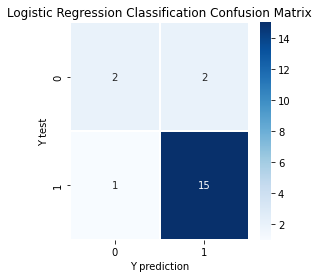

0.85


In [22]:
log_reg = LogisticRegression(C=13)

log_reg.fit(x_train, y_train)

Y_prediction = log_reg.predict(x_test)

log_reg_cm = confusion_matrix(y_test, Y_prediction)
f, ax = plt.subplots(figsize=(4,4))
sns.heatmap(log_reg_cm, annot=True, linewidth=2, linecolor='white', fmt='g', ax=ax, cmap="Blues")
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('Y prediction')
plt.ylabel('Y test')
plt.show()

score_log_reg = log_reg.score(x_test, y_test)
print(score_log_reg)

In [23]:
ModelName.append("LR")
ModelAccuracy.append(0.85)

#Support Victor Machine


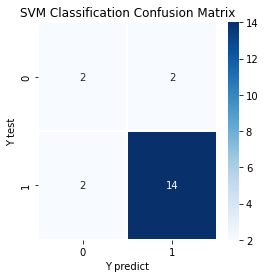

0.8


In [24]:
svm_classfication = OneVsRestClassifier(BaggingClassifier(SVC(C=10,kernel='rbf',random_state=42, probability=True),n_jobs=-1))

svm_classfication.fit(x_train, y_train)

Y_prediction2 = svm_classfication.predict(x_test)

svm_classfication_cm = confusion_matrix(y_test, Y_prediction2)
f, ax = plt.subplots(figsize=(4,4))

sns.heatmap(svm_classfication_cm, annot=True, linewidth=2, linecolor='white', fmt='g', ax=ax, cmap="Blues")
plt.title('SVM Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

score_svm_classfication = svm_classfication.score(x_test, y_test)
print(score_svm_classfication)

In [25]:
ModelName.append("SVM")
ModelAccuracy.append(0.70)

#k-Nearest Neighbors

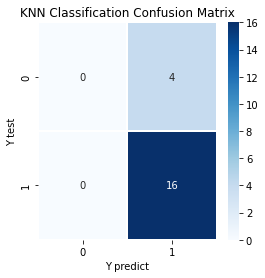

0.8


In [26]:
knnclass = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)

knnclass.fit(x_train, y_train)

Y_prediction = knnclass.predict(x_test)

knnclass_convmtrx = confusion_matrix(y_test, Y_prediction)
f, ax = plt.subplots(figsize=(4,4))
sns.heatmap(knnclass_convmtrx, annot=True, linewidth=2, linecolor='white', fmt='g', ax=ax, cmap="Blues")
plt.title('KNN Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

score_knnclass= knnclass.score(x_test, y_test)
print(score_knnclass)

In [27]:
ModelName.append("kNN")
ModelAccuracy.append(0.80)

#Decision Tree


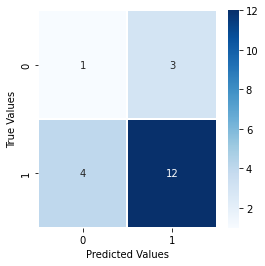

0.65


In [28]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)

f, ax = plt.subplots(figsize=(4,4))
sns.heatmap(conf_mat,annot=True,linewidths=2,linecolor="white",fmt="g",ax=ax, cmap="Blues")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()
score_DTclass= dt.score(x_test, y_test)
print(score_DTclass)

In [80]:
ModelName.append("Decision Tree")
ModelAccuracy.append(0.65)

#Random Forest

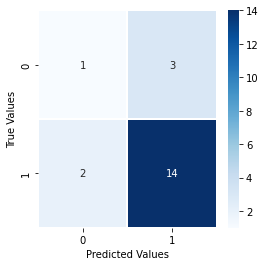

0.75


In [33]:
randomf = RandomForestClassifier(n_estimators=100)
randomf.fit(x_train,y_train)

y_pred = randomf.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)

f, ax = plt.subplots(figsize=(4,4))
sns.heatmap(conf_mat,annot=True,linewidths=2,linecolor="white",fmt="g",ax=ax, cmap="Blues")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()
score_RFclass= randomf.score(x_test, y_test)
print(score_RFclass)

In [81]:
ModelName.append("Random Forest")
ModelAccuracy.append(0.75)

#Naive Bayes

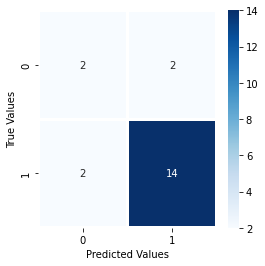

0.8


In [71]:
nb = GaussianNB()

nb.fit(x_test,y_test)

y_pred = nb.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)

f, ax = plt.subplots(figsize=(4,4))
sns.heatmap(conf_mat,annot=True,linewidths=2,linecolor="white",fmt="g",ax=ax, cmap="Blues")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()
score_RFclass= nb.score(x_test, y_test)
print(score_RFclass)

In [82]:
ModelName.append("Naive Bayes")
ModelAccuracy.append(0.80)

#Comparison of the accuracy between all models

Text(0, 0.5, 'Model_Accuracy')

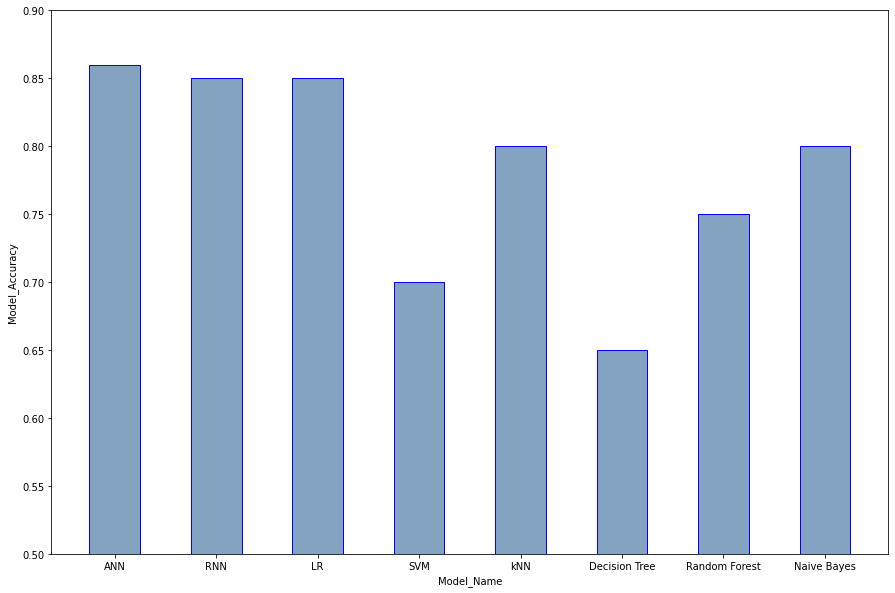

In [83]:
plt.figure(figsize=(15,10))
plt.bar(ModelName, ModelAccuracy, width=0.5, color=(0.2, 0.4, 0.6, 0.6),edgecolor='blue')
plt.ylim([0.50,0.90])
plt.xlabel('Model_Name')
plt.ylabel('Model_Accuracy')